## Install and Import Library

In [68]:
!pip install -q git+https://github.com/tensorflow/docs

In [69]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas.util.testing as tm


In [71]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read and Inspect (a little) Dataset

In [72]:
df_math = pd.read_csv("/content/drive/My Drive/DataPrepAssigment5/student-mat.csv",delimiter=';')

In [73]:
df_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [74]:
df_math['absences'] = df_math['absences'].fillna(df_math['absences'].mean())
df_math['G1'] = df_math['G1'].fillna(df_math['G1'].mean())
df_math['G2'] = df_math['G2'].fillna(df_math['G2'].mean())

In [75]:
df_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [76]:
df_math.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [77]:
df_math.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [78]:
df_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [79]:
def getDuplicateColumns(df_math):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df_math.shape[1]):
        # Select column at xth index.
        col = df_math.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df_math.shape[1]):
            # Select column at yth index.
            otherCol = df_math.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df_math.columns.values[y])
    return list(duplicateColumnNames)

In [80]:
# Get list of duplicate columns
duplicateColumnNames = getDuplicateColumns(df_math)
print('Duplicate Columns are as follows')
for col in duplicateColumnNames:
    print('Column name : ', col)

Duplicate Columns are as follows


In [81]:
X, y = df_math.drop(['G3'],axis=1), df_math['G3'] ## Split the features and label

In [82]:
cat_col = X.drop(['G1','G2','absences'],axis=1).columns ## Take all the category column
for col in cat_col:
  X[col] = X[col].astype('category') ## Change their type into categorical so that we can use pd.get_dummies

In [83]:
X = pd.get_dummies(X) ## One Hot Encoding all categorical features

In [84]:
num_col = ['G1','G2','absences'] ## Take all numerical columns
for col in num_col:
  sc = StandardScaler()
  X[col] =sc.fit_transform(X[col].values.reshape(-1,1)) ## Standardize them


In [85]:
# # Fill NaN with ' '
#X['absences'] = X['absences'].fillna(' ')
# Full NaN with  the mean of the column
#X['G1'] = X['G1'].fillna(' ')
#X['G2'] = X['G2'].fillna(' ')

In [86]:
X.describe()

,absences,G1,G2,school_GP,school_MS,sex_F,sex_M,age_15,age_16,age_17,age_18,age_19,age_20,age_21,age_22,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Medu_0,Medu_1,Medu_2,Medu_3,Medu_4,Fedu_0,Fedu_1,Fedu_2,Fedu_3,Fedu_4,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,famrel_1,famrel_2,famrel_3,famrel_4,famrel_5,freetime_1,freetime_2,freetime_3,freetime_4,freetime_5,goout_1,goout_2,goout_3,goout_4,goout_5,Dalc_1,Dalc_2,Dalc_3,Dalc_4,Dalc_5,Walc_1,Walc_2,Walc_3,Walc_4,Walc_5,health_1,health_2,health_3,health_4,health_5
count,3.950000e+02,3.950000e+02,3.950000e+02,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.00000,395.000000,395.000000
mean,1.914783e-17,-5.424634e-17,-1.262000e-16,0.883544,0.116456,0.526582,0.473418,0.207595,0.263291,0.248101,0.207595,0.060759,0.007595,0.002532,0.002532,0.222785,0.777215,0.711392,0.288608,0.103797,0.896203,0.007595,0.149367,0.260759,0.250633,0.331646,0.005063,0.207595,0.291139,0.253165,0.243038,0.149367,0.086076,0.356962,0.260759,0.146835,0.050633,0.045570,0.549367,0.281013,...,0.491139,0.508861,0.205063,0.794937,0.050633,0.949367,0.167089,0.832911,0.665823,0.334177,0.020253,0.045570,0.172152,0.493671,0.268354,0.048101,0.162025,0.397468,0.291139,0.101266,0.058228,0.260759,0.329114,0.217722,0.134177,0.698734,0.189873,0.065823,0.022785,0.022785,0.382278,0.215190,0.202532,0.129114,0.070886,0.118987,0.113924,0.23038,0.167089,0.369620
std,1.001268e+00,1.001268e+00,1.001268e+00,0.321177,0.321177,0.499926,0.499926,0.406099,0.440978,0.432459,0.406099,0.239192,0.086927,0.050315,0.050315,0.416643,0.416643,0.453690,0.453690,0.305384,0.305384,0.086927,0.356902,0.439606,0.433927,0.471401,0.071066,0.406099,0.454864,0.435376,0.429462,0.356902,0.280832,0.479711,0.439606,0.354391,0.219525,0.208814,0.498188,0.450064,...,0.500555,0.500555,0.404260,0.404260,0.219525,0.219525,0.373528,0.373528,0.472300,0.472300,0.141044,0.208814,0.377991,0.500594,0.443665,0.214252,0.368941,0.489995,0.454864,0.302063,0.234471,0.439606,0.470487,0.413220,0.341275,0.459390,0.392698,0.248287,0.149406,0.149406,0.486560,0.411475,0.402396,0.335751,0.256960,0.324184,0.318122,0.42161,0.373528,0.483314
min,-7.142362e-01,-2.385787e+00,-2.851920e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,-7.142362e-01,-8.774869e-01,-4.562264e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [87]:
X.head()

,absences,G1,G2,school_GP,school_MS,sex_F,sex_M,age_15,age_16,age_17,age_18,age_19,age_20,age_21,age_22,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Medu_0,Medu_1,Medu_2,Medu_3,Medu_4,Fedu_0,Fedu_1,Fedu_2,Fedu_3,Fedu_4,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,famrel_1,famrel_2,famrel_3,famrel_4,famrel_5,freetime_1,freetime_2,freetime_3,freetime_4,freetime_5,goout_1,goout_2,goout_3,goout_4,goout_5,Dalc_1,Dalc_2,Dalc_3,Dalc_4,Dalc_5,Walc_1,Walc_2,Walc_3,Walc_4,Walc_5,health_1,health_2,health_3,health_4,health_5
0,0.036424,-1.782467,-1.254791,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,-0.213796,-1.782467,-1.520979,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,...,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0.536865,-1.179147,-0.722415,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
3,-0.464016,1.234133,0.874715,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,...,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,-0.213796,-1.480807,-0.190038,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [88]:
# Check the index values
X.index.values


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [89]:
def build_model():
  model = keras.Sequential([
    layers.Dense(8, activation='relu', input_shape=[X.shape[1]]),
    layers.Dense(8, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.Adam(lr=0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [90]:
model = build_model()
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [91]:
EPOCHS = 1000

history = model.fit(
  X_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:136.9660,  mae:10.7437,  mse:136.9660,  val_loss:141.5303,  val_mae:11.2666,  val_mse:141.5303,  
....................................................................................................
Epoch: 100, loss:2.2959,  mae:1.1162,  mse:2.2959,  val_loss:2.0332,  val_mae:1.1421,  val_mse:2.0332,  
....................................................................................................
Epoch: 200, loss:0.7581,  mae:0.6592,  mse:0.7581,  val_loss:2.7175,  val_mae:1.3089,  val_mse:2.7175,  
....................................................................................................
Epoch: 300, loss:0.2822,  mae:0.3994,  mse:0.2822,  val_loss:2.9384,  val_mae:1.3324,  val_mse:2.9384,  
....................................................................................................
Epoch: 400, loss:0.1334,  mae:0.2617,  mse:0.1334,  val_loss:3.1121,  val_mae:1.4071,  val_mse:3.1121,  
..............................................................

In [92]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.007679,0.055589,0.007679,4.050243,1.611172,4.050243,995
996,0.007670,0.053372,0.007670,4.025933,1.604763,4.025933,996
997,0.007587,0.051321,0.007587,4.114093,1.612466,4.114093,997
998,0.010130,0.070880,0.010130,4.114883,1.613410,4.114883,998
999,0.009675,0.065557,0.009675,4.109969,1.619207,4.109969,999


In [93]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [G3]')

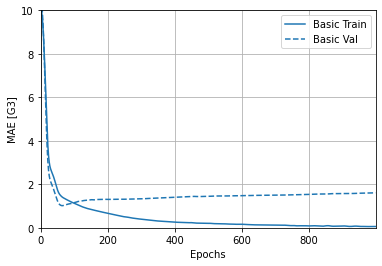

In [94]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [G3]')

Text(0, 0.5, 'MSE [G2^2]')

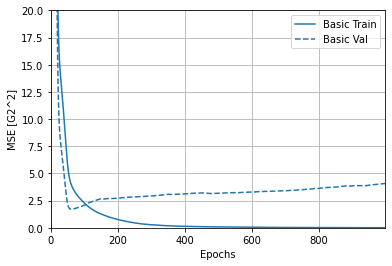

In [95]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 20])
plt.ylabel('MSE [G2^2]')

In [96]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

early_history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:113.1043,  mae:9.7117,  mse:113.1043,  val_loss:113.7085,  val_mae:9.9410,  val_mse:113.7085,  
....................................................................................................
Epoch: 100, loss:2.3820,  mae:1.1350,  mse:2.3820,  val_loss:2.4079,  val_mae:1.1701,  val_mse:2.4079,  
.............................................................................

Text(0, 0.5, 'MAE [G3]')

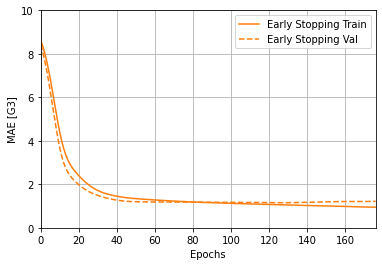

In [97]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [G3]')

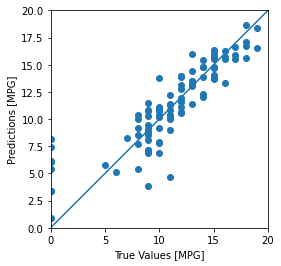

In [98]:
test_predictions = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 20]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)



In [99]:
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} G3 Score".format(mae))

4/4 - 0s - loss: 4.9142 - mae: 1.5538 - mse: 4.9142
Testing set Mean Abs Error:  1.55 G3 Score
